<a href="https://colab.research.google.com/github/yosser-gh/Employee-Attrition-Prediction/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Load the required Python libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset
df = pd.read_csv('/Employee-Attrition.csv')

**Data exploration**

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Checking for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Data visualization**

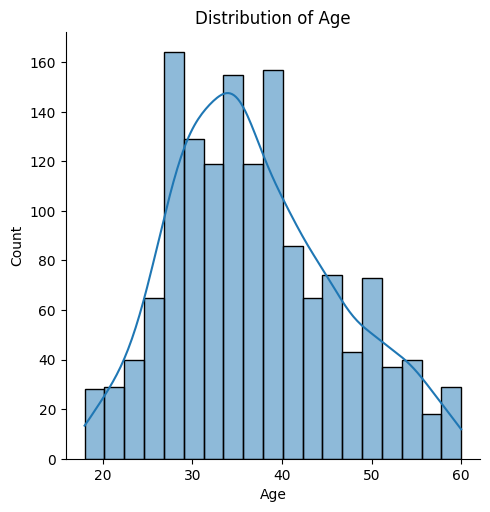

In [6]:
sns.displot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

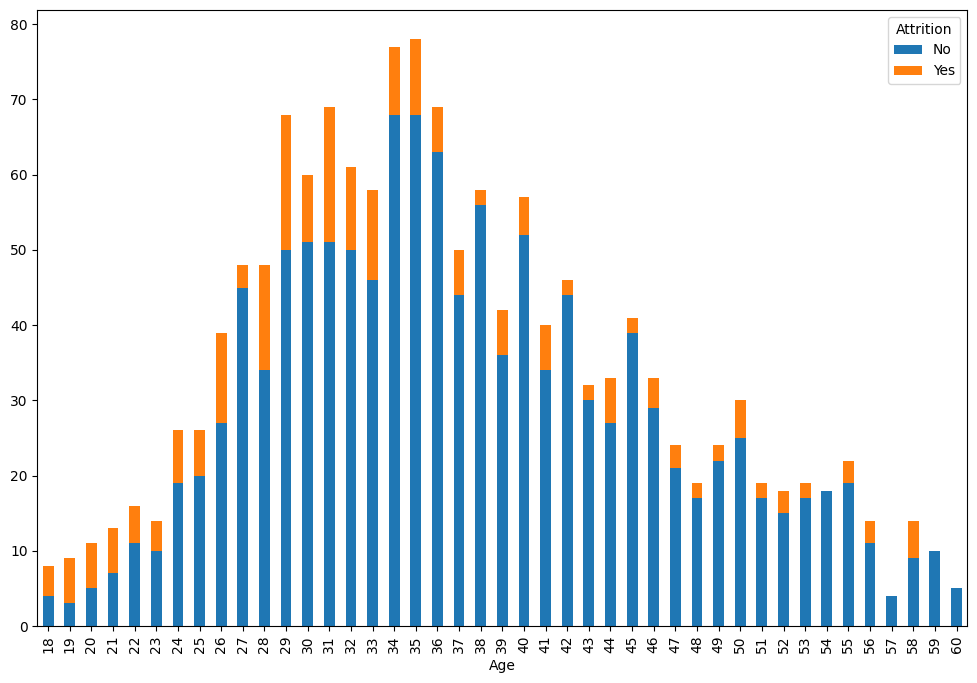

In [7]:
df.groupby(['Age', 'Attrition']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))

plt.savefig('histplot_attrition.png')

In [9]:
# Filter the data to show only "Yes" values in the "Attrition" column
attrition_data = df[df['Attrition'] == 'Yes']

# Calculate the count of attrition by department
attrition_by = attrition_data.groupby(['Department']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['Department'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Department', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

In [18]:
attrition_by = attrition_data.groupby(['EducationField']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['EducationField'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Educational Field', font=dict(size=14), legend=dict(
    orientation="h", yanchor="bottom", y=1, xanchor="right", x=1
))


# Show the chart
fig.show()

In [19]:
attrition_by = attrition_data.groupby(['Gender']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['Gender'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Gender', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

In [21]:
fig = px.scatter(df, x="Age", y="MonthlyIncome", color="Attrition", trendline="ols")
fig.update_layout(title="Age vs. Monthly Income by Attrition")

fig.show()

In [22]:
#Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_encoders = {}
binary_columns = ['Attrition', 'OverTime', 'Gender','Over18']

for column in binary_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# One-hot encode categorical columns
df_filled = pd.get_dummies(df, columns=['JobRole', 'Department', 'MaritalStatus','EducationField','BusinessTravel'], drop_first=True)

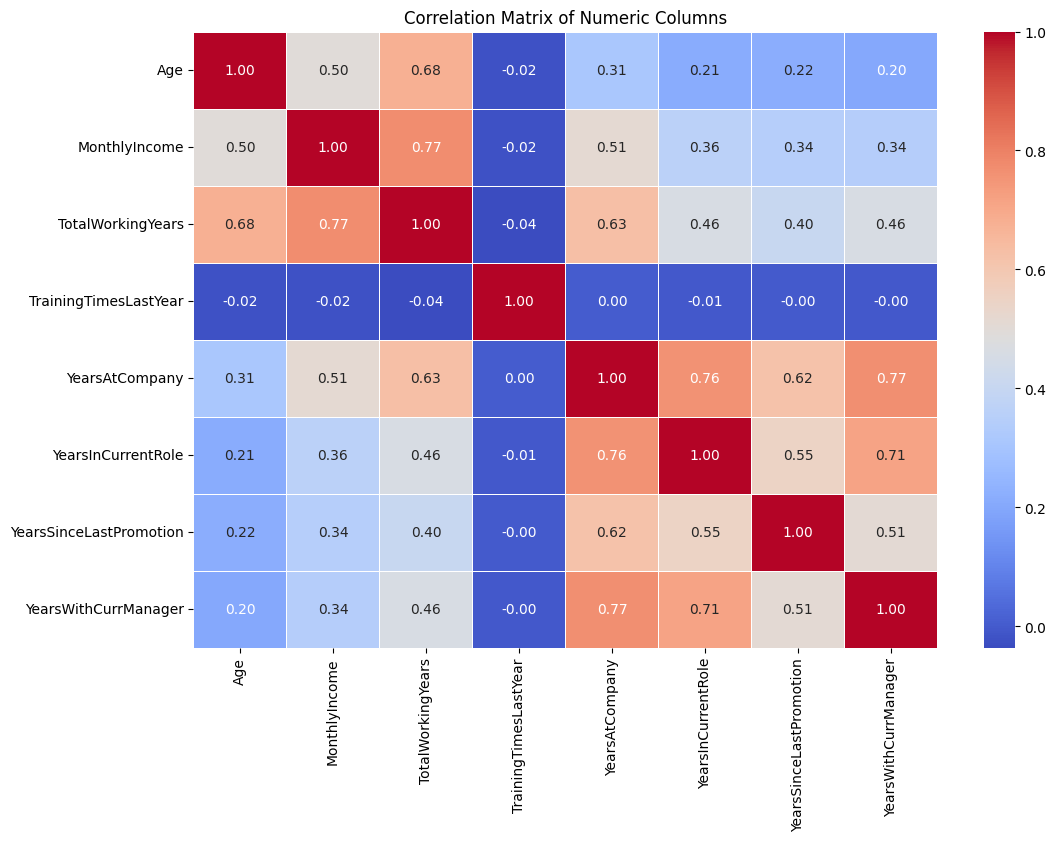

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df[['Age','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [24]:
# Normalize numerical columns
scaler = StandardScaler()
numeric_columns = numeric_df.columns
df_filled[numeric_columns] = scaler.fit_transform(df_filled[numeric_columns])

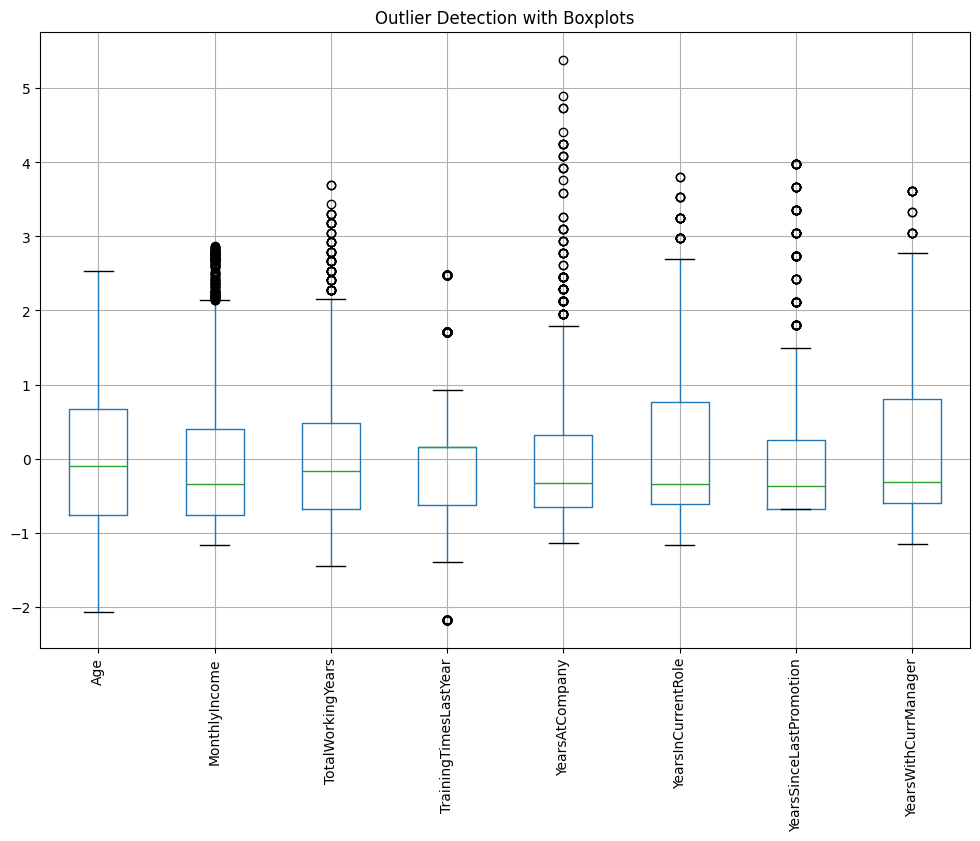

In [25]:
# Detecting outliers using box plots
df_filled[numeric_columns].boxplot(figsize=(12,8), rot=90)
plt.title("Outlier Detection with Boxplots")
plt.show()